In [64]:
import pandas as pd

# Load preprocessed CSV
df = pd.read_csv("alloy_data.csv")
df.head()


,Alloy_Type,Fe (%),C (%),Cr (%),Ni (%),Grain_Size(µm),Heat_Treatment_Annealed,Heat_Treatment_Normalized,Heat_Treatment_Quenched,Heat_Treatment_Tempered
0,Steel_A,98.0,0.50,0.2,0.3,12,1,0,0,0
1,Steel_B,97.0,0.80,0.5,0.2,10,0,1,0,0
2,Stainless_Steel_304,70.0,0.10,18.0,8.0,8,0,0,1,0
3,Stainless_Steel_316,65.0,0.08,16.0,10.0,9,0,0,1,0
4,Aluminium_6061,0.3,0.00,0.2,1.0,25,1,0,0,0


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Alloy_Type                 30 non-null     object 
 1   Fe (%)                     30 non-null     float64
 2   C (%)                      30 non-null     float64
 3   Cr (%)                     30 non-null     float64
 4   Ni (%)                     30 non-null     float64
 5   Grain_Size(µm)             30 non-null     int64  
 6   Heat_Treatment_Annealed    30 non-null     int64  
 7   Heat_Treatment_Normalized  30 non-null     int64  
 8   Heat_Treatment_Quenched    30 non-null     int64  
 9   Heat_Treatment_Tempered    30 non-null     int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 2.5+ KB


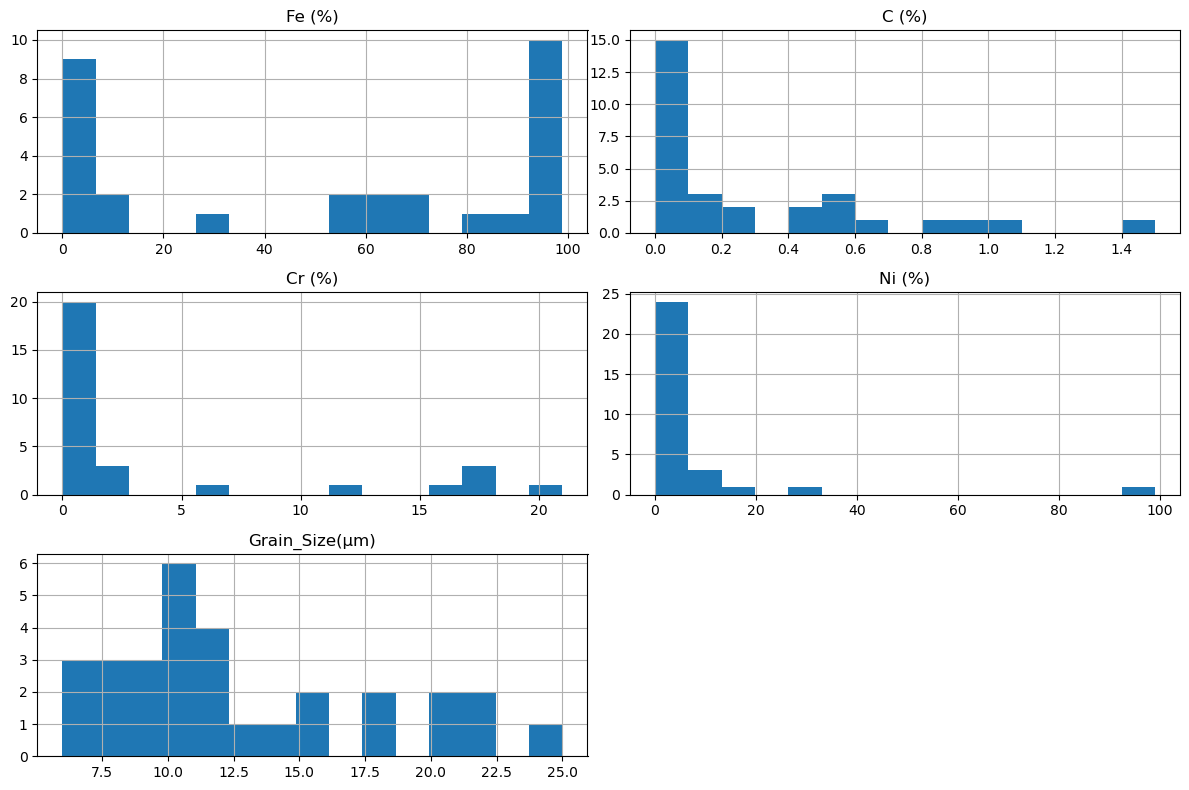

In [70]:
import matplotlib.pyplot as plt

numeric_cols = ["Fe (%)", "C (%)", "Cr (%)", "Ni (%)", "Grain_Size(µm)"]
df[numeric_cols].hist(bins=15, figsize=(12,8))
plt.tight_layout()
plt.show()


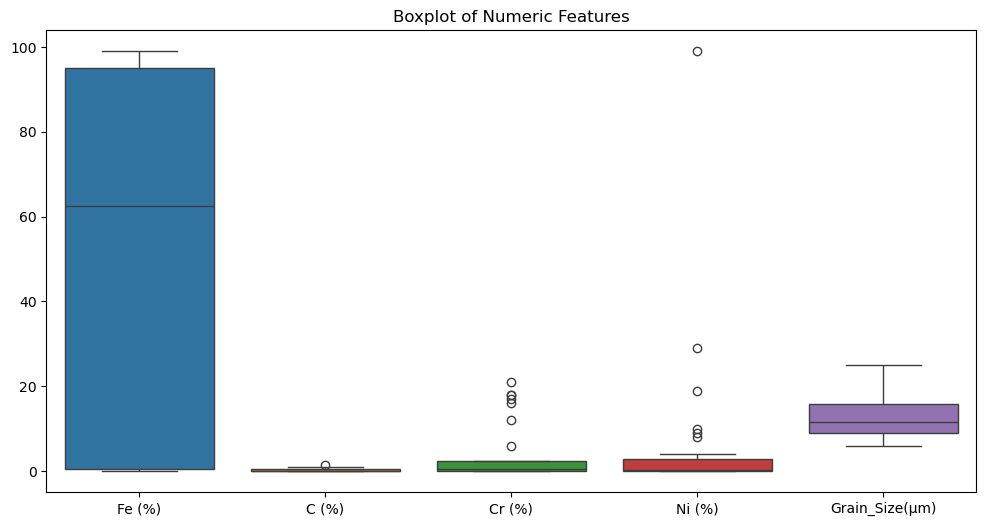

In [72]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.show()


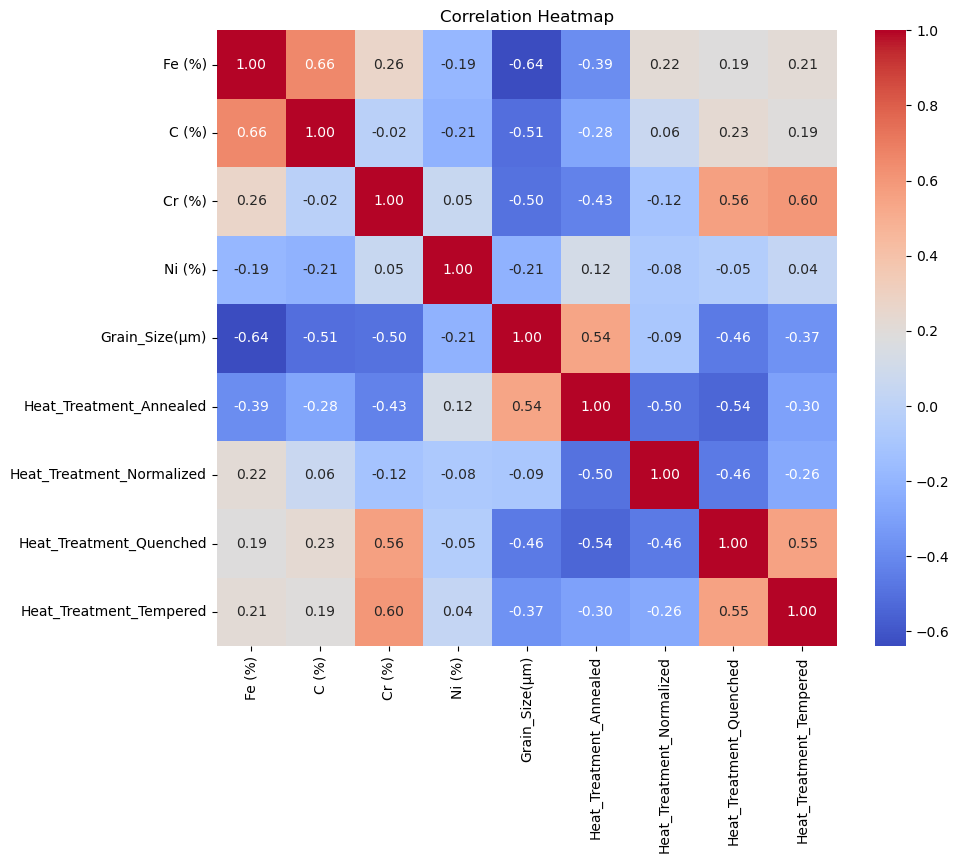

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV
df = pd.read_csv("alloy_data.csv")

# 2. Compute the correlation matrix (only for numeric columns)
corr = df.corr(numeric_only=True)

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load data
df = pd.read_csv("alloy_data.csv")

# 2. Separate features (X) and target (y) 
#    👉 Change 'target_column' to your actual target column name
X = df.drop('Alloy_Type', axis=1)
y = df['Alloy_Type']

# 3. Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# 4. Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),         # Handle missing values
    ('scaler', StandardScaler())                         # Standardization
])

# OR use MinMaxScaler() for normalization
# ('scaler', MinMaxScaler())

# 5. Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle missing categories
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode
])

# 6. Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# 7. Apply train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Fit and transform training data, transform test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("✅ Preprocessing complete!")
print("Training set shape:", X_train_processed.shape)
print("Test set shape:", X_test_processed.shape)


✅ Preprocessing complete!
Training set shape: (24, 9)
Test set shape: (6, 9)


In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load data
df = pd.read_csv("alloy_data.csv")

# 2. Features & target
X = df.drop("Grain_Size(µm)", axis=1)
y = df["Grain_Size(µm)"]

# 3. Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# 4. Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# 7. Train, predict & evaluate
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# 8. Display results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(results_df.sort_values(by="R²", ascending=False))


               Model       MAE      RMSE        R²
2   Lasso Regression  3.973669  4.938366  0.042586
1   Ridge Regression  3.891938  4.950227  0.037982
0  Linear Regression  3.955845  5.014435  0.012864
3      Random Forest  4.288333  5.221275 -0.070253
4  Gradient Boosting  5.228217  6.360046 -0.588011



📊 Cross-Validation Results:
               Model  CV Mean R²  CV Std R²
1   Ridge Regression    0.510790   0.268798
0  Linear Regression    0.478794   0.272198
2   Lasso Regression    0.460425   0.255189
3      Random Forest    0.264936   0.280825
4  Gradient Boosting    0.131487   0.489290

📈 Linear Regression
Train R²: 1.000
Test R²:  0.013

📈 Ridge Regression
Train R²: 0.960
Test R²:  0.038

📈 Lasso Regression
Train R²: 0.998
Test R²:  0.043

📈 Random Forest
Train R²: 0.923
Test R²:  -0.070

📈 Gradient Boosting
Train R²: 1.000
Test R²:  -0.588


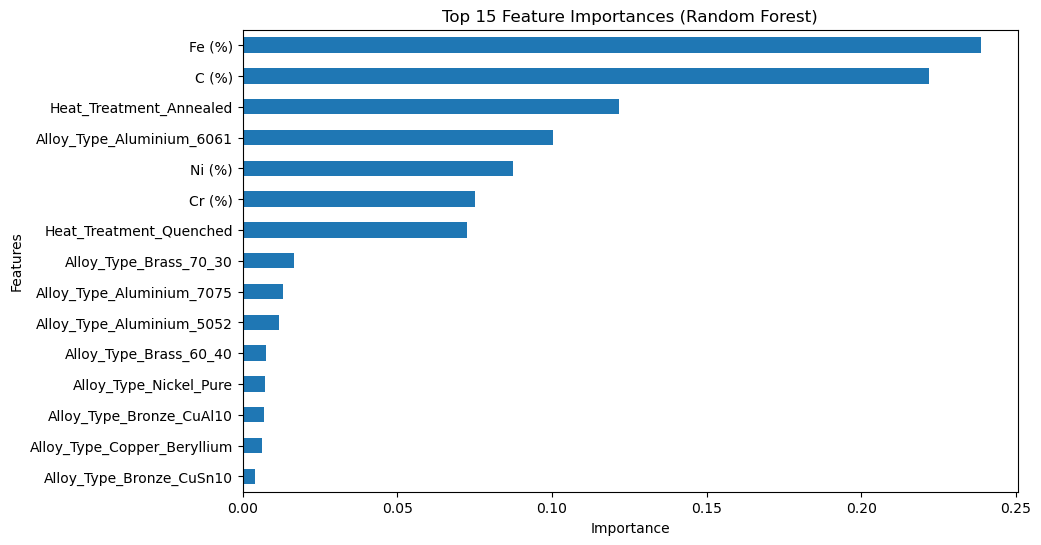

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("alloy_data.csv")

# 2. Features & target
X = df.drop("Grain_Size(µm)", axis=1)
y = df["Grain_Size(µm)"]

# 3. Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# 4. Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# 7. K-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

for name, model in models.items():
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('model', model)])
    cv_r2 = cross_val_score(pipe, X, y, cv=kf, scoring='r2')
    cv_results.append([name, cv_r2.mean(), cv_r2.std()])

cv_df = pd.DataFrame(cv_results, columns=["Model", "CV Mean R²", "CV Std R²"])
print("\n📊 Cross-Validation Results:")
print(cv_df.sort_values(by="CV Mean R²", ascending=False))

# 8. Overfitting / Underfitting check
for name, model in models.items():
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('model', model)])
    pipe.fit(X_train, y_train)
    train_r2 = pipe.score(X_train, y_train)
    test_r2 = pipe.score(X_test, y_test)
    print(f"\n📈 {name}")
    print(f"Train R²: {train_r2:.3f}")
    print(f"Test R²:  {test_r2:.3f}")

# 9. Feature Importance (Tree Models)
tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

tree_model.fit(X_train, y_train)

# Get feature names after preprocessing
cat_features = tree_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_features = list(numeric_cols) + list(cat_features)

importances = tree_model.named_steps['model'].feature_importances_

# Plot feature importances
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp[:15].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load data
df = pd.read_csv("alloy_data.csv")

# 2. Features & target
X = df.drop("Grain_Size(µm)", axis=1)
y = df["Grain_Size(µm)"]

# 3. Preprocessing
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# 6. Train & evaluate
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(pipe, X, y, cv=kf, scoring='r2').mean()

    results.append([name, mae, rmse, r2, cv_r2])

# 7. Results dataframe
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "Test R²", "CV Mean R²"])
results_df = results_df.sort_values(by="Test R²", ascending=False)
print("\n📊 Baseline Model Comparison:")
print(results_df)



📊 Baseline Model Comparison:
               Model       MAE      RMSE   Test R²  CV Mean R²
2   Lasso Regression  3.973669  4.938366  0.042586    0.460425
1   Ridge Regression  3.891938  4.950227  0.037982    0.510790
0  Linear Regression  3.955845  5.014435  0.012864    0.478794
3      Random Forest  4.288333  5.221275 -0.070253    0.264936
4  Gradient Boosting  5.228217  6.360046 -0.588011    0.131487


In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load data
df = pd.read_csv("alloy_data.csv")

# 2. Features & target
X = df.drop("Grain_Size(µm)", axis=1)
y = df["Grain_Size(µm)"]

# 3. Preprocessing
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========================
# 🔥 Random Forest Tuning
# ========================
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

rf_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# ========================
# 🔥 Gradient Boosting Tuning
# ========================
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

gb_params = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [2, 3, 4, 5],
    'model__subsample': [0.8, 1.0]
}

gb_grid = GridSearchCV(gb_pipeline, gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)

# ========================
# 🔥 SVR Tuning (RandomizedSearchCV for speed)
# ========================
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR())
])

svr_params = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto', 0.1, 0.01],
    'model__kernel': ['rbf', 'poly']
}

svr_random = RandomizedSearchCV(svr_pipeline, svr_params, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
svr_random.fit(X_train, y_train)

# ========================
# ✅ Results Comparison
# ========================
models = {
    "Random Forest (Tuned)": rf_grid,
    "Gradient Boosting (Tuned)": gb_grid,
    "SVR (Tuned)": svr_random
}

results = []
for name, model in models.items():
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2, model.best_params_])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²", "Best Params"])
print("\n📊 Tuned Model Results:")
print(results_df.sort_values(by="R²", ascending=False))



📊 Tuned Model Results:
                       Model       MAE      RMSE        R²  \
0      Random Forest (Tuned)  3.593811  4.291758  0.276891   
1  Gradient Boosting (Tuned)  4.450974  5.595543 -0.229186   
2                SVR (Tuned)  3.924181  5.768803 -0.306486   

                                         Best Params  
0  {'model__max_depth': None, 'model__min_samples...  
1  {'model__learning_rate': 0.01, 'model__max_dep...  
2  {'model__kernel': 'rbf', 'model__gamma': 'scal...  


📊 Final Performance on Hold-Out Set:
MAE  : 4.918
RMSE : 6.068
R²   : -0.446


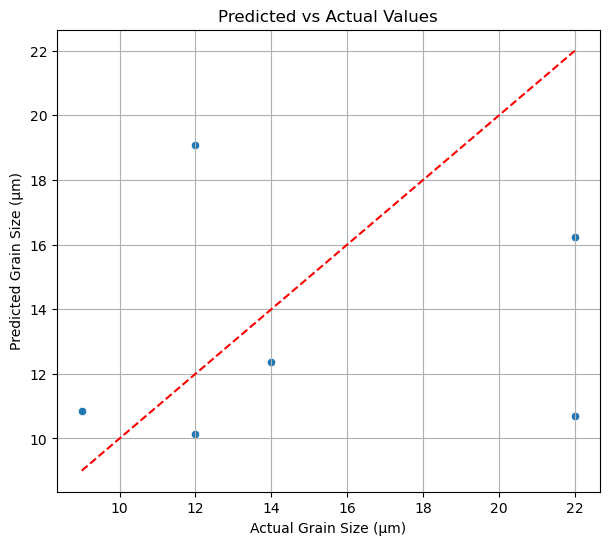

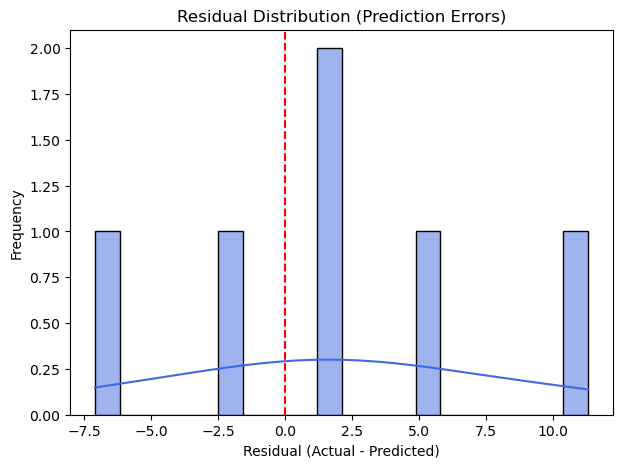

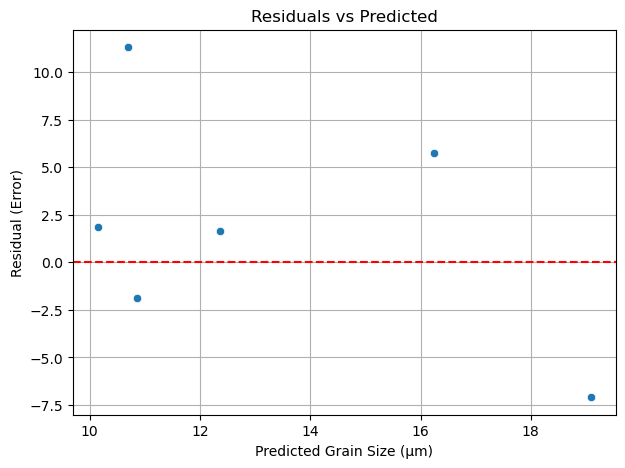

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load data
df = pd.read_csv("alloy_data.csv")

# 2. Features & target
X = df.drop("Grain_Size(µm)", axis=1)
y = df["Grain_Size(µm)"]

# 3. Preprocessing
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 4. Train-test split (hold-out set: 20%)
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Best model from tuning (example hyperparameters)
best_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

# 6. Train on training set
pipeline.fit(X_train, y_train)

# 7. Predict on holdout set
y_pred = pipeline.predict(X_holdout)

# 8. Evaluate performance
mae = mean_absolute_error(y_holdout, y_pred)
rmse = np.sqrt(mean_squared_error(y_holdout, y_pred))
r2 = r2_score(y_holdout, y_pred)

print("📊 Final Performance on Hold-Out Set:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

# ===============================
# 📉 9. Visualize Prediction Errors
# ===============================

# (a) Predicted vs Actual
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_holdout, y=y_pred)
plt.plot([y_holdout.min(), y_holdout.max()], [y_holdout.min(), y_holdout.max()], 'r--')
plt.xlabel("Actual Grain Size (µm)")
plt.ylabel("Predicted Grain Size (µm)")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()

# (b) Residuals (Error Distribution)
residuals = y_holdout - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, bins=20, color='royalblue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution (Prediction Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# (c) Residuals vs Predicted (check for bias)
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Grain Size (µm)")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()
